In [0]:
###### Lgogistic Regression  ###########

In [0]:
## As this code is executed on colab, I just mounted G-Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing all the required libraries
# Reading the (.csv)file using Pandas
## .head() This function returns the first n rows for the object based on position.

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project-GL/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
##### Pandas describe().T is used to view  mean, std ,min,max,etc

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
#### Replacing the null values with zeros

In [0]:
data1 = data.copy(deep=True)
data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [0]:
#### Replacing the zeros values with mean and median 

In [0]:
data1['Glucose'].fillna(data1['Glucose'].mean(), inplace = True)
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(), inplace = True)
data1['SkinThickness'].fillna(data1['SkinThickness'].median(), inplace = True)
data1['Insulin'].fillna(data1['Insulin'].median(), inplace = True)
data1['BMI'].fillna(data1['BMI'].mean(), inplace = True)

In [0]:
## ploting the data set after making all the considerations

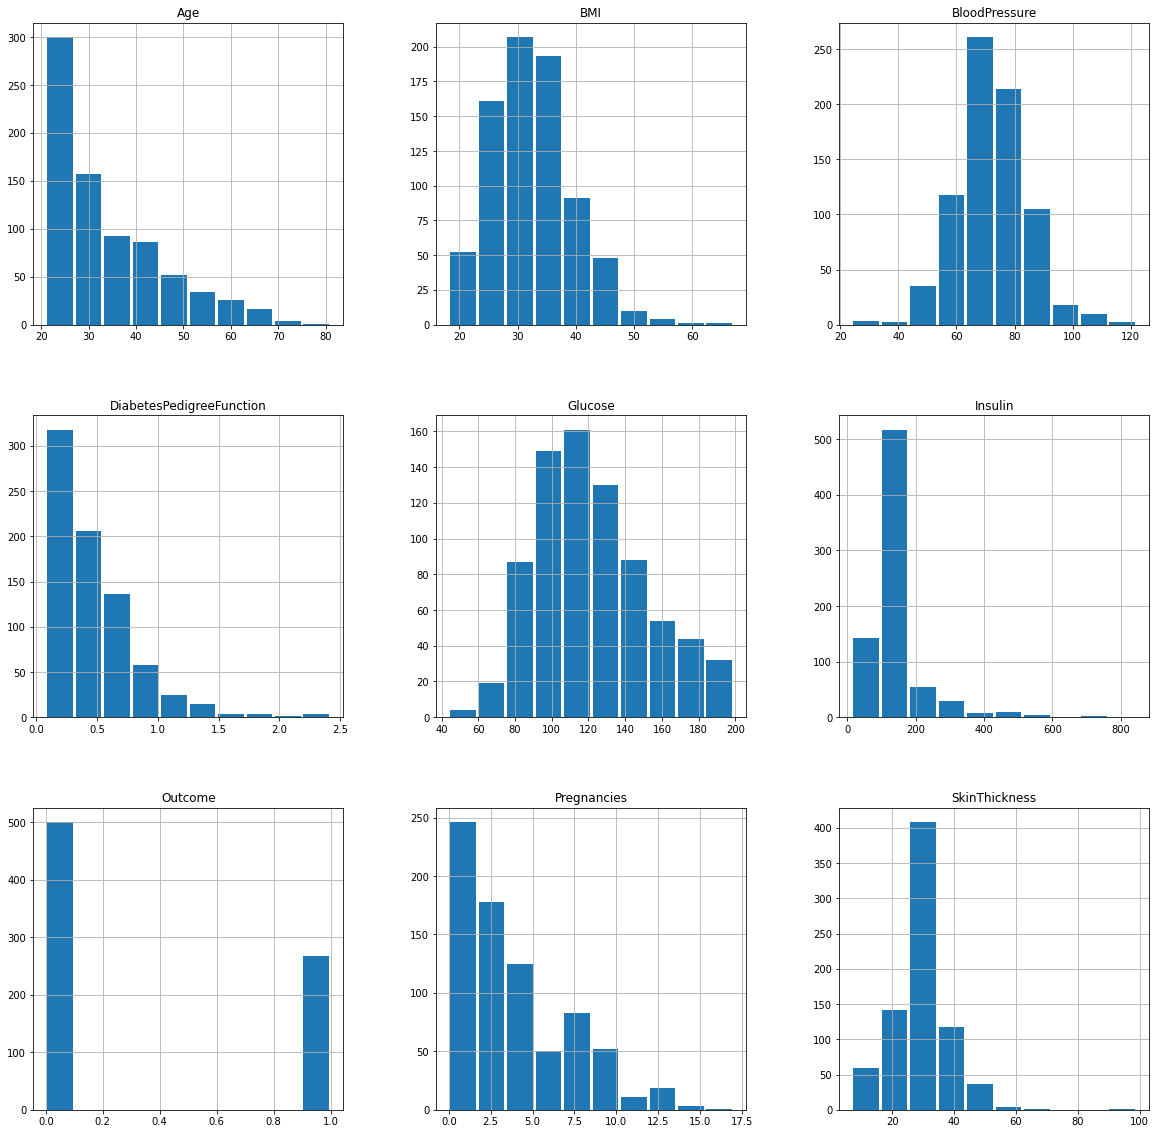

In [12]:
p = data1.hist(figsize = (20,20), rwidth=0.9)

In [0]:
######   Assigning the Dependent parameter (output prediction) to y & Independent values to x

In [0]:
x = data1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].values
y = data1[['Outcome']].values

In [0]:
#### Model 

In [14]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7690972222222222

In [0]:
### predicting the Test data,accuracy

In [0]:
predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       132
           1       0.65      0.67      0.66        60

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.78125


In [0]:
#######  support vector machine ##############
### Import the required Libraries
### Reading the .csv files
## .head() This function returns the first n rows for the object based on position.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
data_svm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project-GL/diabetes.csv')
data_svm.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
## Selecting the Dependent & Independent parameters and assigning to y & x
### Predicting the y

In [22]:
X = data_svm.iloc[:,0:9].values
y = data_svm.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
cfr = SVC(kernel = 'rbf', random_state = 0)
cfr.fit(X_train, y_train)
y_pred = cfr.predict(X_test)
accuracies = cross_val_score(estimator = cfr, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7481548699334544

In [0]:
###############  Naive Bayes Algorithm  #####################
### Import the required Libraries
### Reading the .csv files
## .head() This function returns the first n rows for the object based on position.


In [23]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
dat = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project-GL/diabetes.csv')
data_nb = dat
data_nb.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
## Selecting the Dependent & Independent parameters and assigning to y & x
### Predicting the y

In [25]:


X = data_nb.iloc[:,0:9].values
y = data_nb.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
model1=GaussianNB()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)



1.0
